### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 2
### Due: Monday, Feb 7th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 7th.

---

## Problem 1

In the lecture you have seen how to fetch and plot quasar spectra using `fetch_sdss_spectrum` given the three parameters plate id, mjd, fiber id.

Look at the spectra of a number of quasars at different redshifts. How do the spectra change as redshift increases? 
(Hint: to get many quasars, try to vary the three parameters. The redshift $z$ is in the plot.)

Make a graph of quasar color as a function of redshift. How do you explain what you see in the graph?

How do spectra change at increasing redshift?


### Solution

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astroML.datasets import fetch_sdss_spectrum, fetch_dr7_quasar, fetch_sdss_S82standards
from astroML.datasets import tools
from scipy.stats import gaussian_kde

#### FIRST ATTEMPT: METHOD FROM TEXTBOOK

In [56]:
target = tools.TARGET_GALAXY
plate, mjd, fiber = tools.query_plate_mjd_fiber(5, primtarget=target)

HTTPError: HTTP Error 404: Not Found

##### I could not figure out how to get past this HTTP Error. I tried uninstalling and reinstalling AstroML and looking for documentation, but I could not find much. I decided to go with a different method for finding parameters for the quasars.

#### SECOND ATTEMPT: USING SDSS PLATE BROWSER TOOL

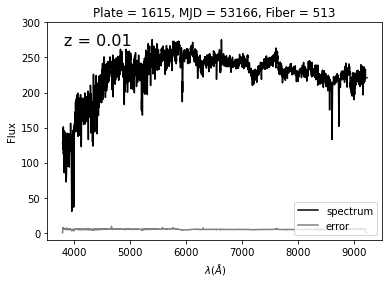

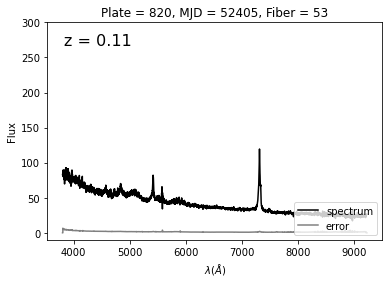

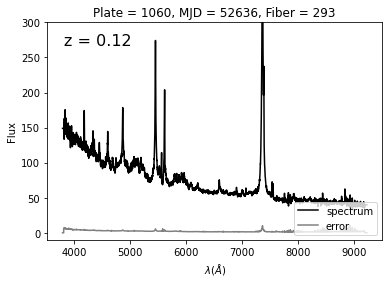

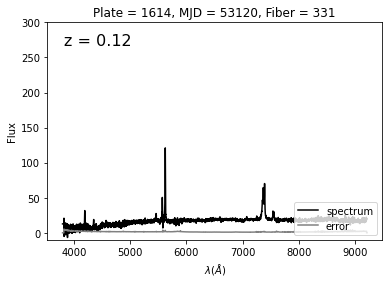

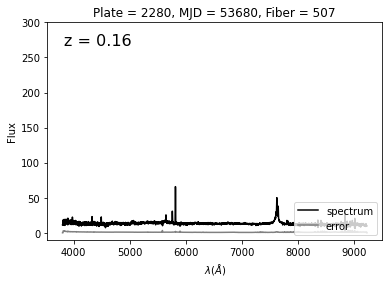

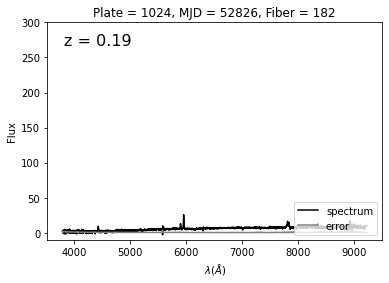

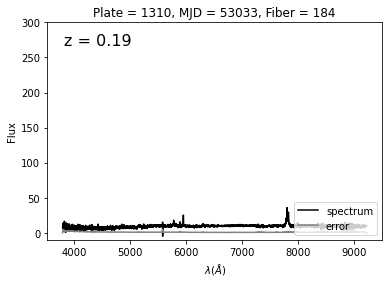

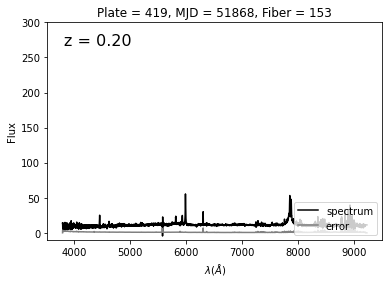

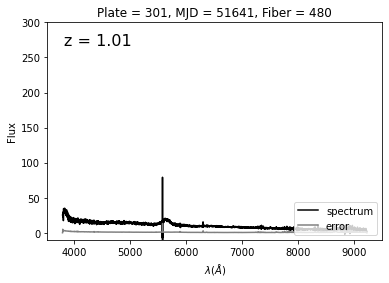

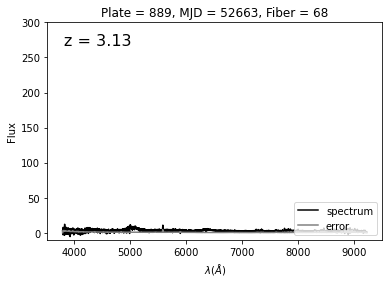

In [32]:
# SECOND ATTEMPT
# Parameter values sourced from SDSS Plate Browser Tool: 
# https://skyserver.sdss.org/dr12/en/tools/getimg/plate.aspx
plates = [1615, 820, 1060, 1614, 2280, 1024, 1310, 419, 301, 889]
mjds = [53166, 52405, 52636, 53120, 53680, 52826, 53033, 51868, 51641, 52663]
fibers = [513, 53, 293, 331, 507, 182, 184, 153, 480, 68]

# For loop to fetch spectra for 10 different quasars
for i in range(0, 10):
    # Assign variables
    plate = plates[i]
    mjd = mjds[i]
    fiber = fibers[i]
    # Fetch spectrum
    spec = fetch_sdss_spectrum(plate, mjd, fiber)
    
    # Plot the spectrum (Sourced from Lecture 2 Notebook)
    ax = plt.axes()
    ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
    ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

    ax.legend(loc=4)

    ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

    ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
            ha='left', va='top', transform=ax.transAxes)

    ax.set_xlabel(r'$\lambda (\AA)$')
    ax.set_ylabel('Flux')

    ax.set_ylim(-10, 300)

    plt.show()

##### As redshift (z) increases, it seems that the total flux of the spectrum decreases. The spectra also appear to become less "noisy" and have decreased variability in general. At low redshifts, the spectra have peaks of high flux at certain wavelengths. At redshift increases, however, peaks are less common and do not tend to reach the same levels of flux. 

##### This makes sense. Because of redshifting, the light that we measure from quasars has longer wavelengths and lower frequencies. This means that we measure the light to have less energy (and less flux) than it does in actuality. It follows that quasars with a higher degree of redshifting would have less flux in general than other quasars with a lower degree of redshift.

#### GRAPH OF QUASAR COLOR AS A FUNCTION OF REDSHIFT

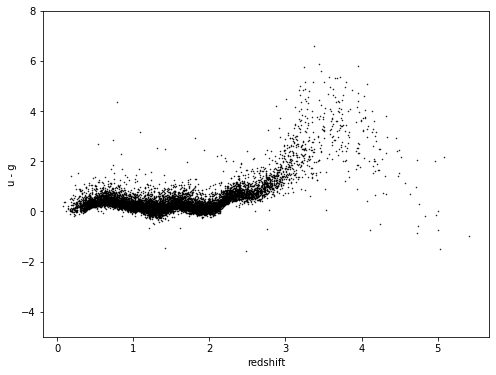

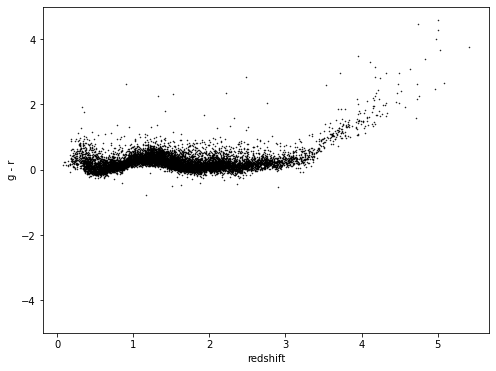

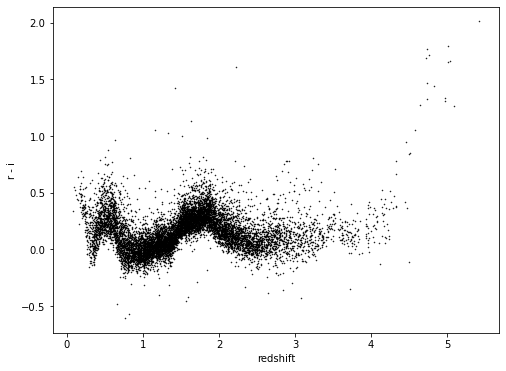

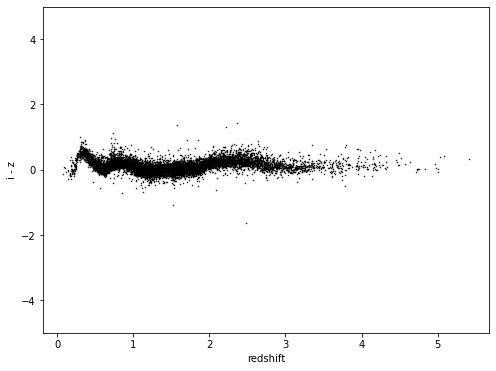

In [88]:
# Get data from Data Release 7 Quasar Catalog
data = fetch_dr7_quasar()
data = data[:10000]

# Extract colors from data

u = data['mag_u']
g = data['mag_g']
r = data['mag_r']
i = data['mag_i']
z = data['mag_z']

# Plotting redshift vs. u - g
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data['redshift'], u - g, marker='.', markersize=1,
    color='black', linestyle='none')

ax.set_ylim(-5, 8)

ax.set_xlabel('redshift')
ax.set_ylabel('u - g')

plt.show()

# Plotting redshift vs. g - r
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data['redshift'], g - r, marker='.', markersize=1,
    color='black', linestyle='none')

ax.set_ylim(-5, 5)

ax.set_xlabel('redshift')
ax.set_ylabel('g - r')

plt.show()

# Plotting redshift vs. r - i
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data['redshift'], r - i, marker='.', markersize=1,
    color='black', linestyle='none')

ax.set_xlabel('redshift')
ax.set_ylabel('r - i')

plt.show()

# Plotting redshift vs. i - z
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data['redshift'], i - z, marker='.', markersize=1,
    color='black', linestyle='none')

ax.set_ylim(-5, 5)

ax.set_xlabel('redshift')
ax.set_ylabel('i - z')

plt.show()

##### Of the above, the most variability in color can be seen in the redshift vs. r - i graph.  According to the textbook, this variation is caused by emission lines entering and exiting the r and i band wavelengths. It makes sense that the most variation should be seen for this particular graph because objects that are redshifted appear redder than they actually are. It follows that a certain amount of redshift corresponds with wavelengths that appear more intense in this filter. Variation in the other graphs has the same explanation: as emission lines enter and exit the band wavelengths of the filters, color magnitude increases and decreases.

## Problem 2

Scatter plots are very useful when visualizing rather sparse, small data sets. Density plots are the right tool for visualizing rather dense, large data sets. 
As many astronomical data sets have both dense and sparse regions, a combination of both is often used.

Using data obtained with `fetch_sdss_S82standards`, generate a scatter plot with contours over dense regions.

### Solution



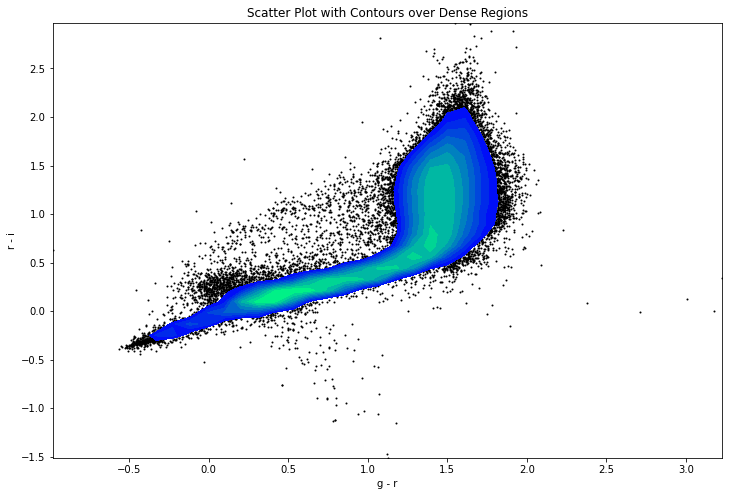

In [87]:
# Fetch Stripe82 data
data = fetch_sdss_S82standards()

# Extract color data
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

# Make figure
fig, ax = plt.subplots(figsize=(12, 8))

# Make the contours. I adapted this code from 
# https://www.astroml.org/book_figures/chapter1/fig_S82_scatter_contour.html#book-fig-chapter1-fig-s82-scatter-contour
scatter_contour(g - r, r - i, threshold=200, log_counts=True,
             histogram2d_args=dict(bins=40),
             plot_args=dict(color='black', markersize=2),
             contour_args=dict(cmap='winter',))

# Add title and axis labels
ax.set_title('Scatter Plot with Contours over Dense Regions')
ax.set_xlabel('g - r')
ax.set_ylabel('r - i')

plt.show()